# Klassifikation von Gitarren (akustisch vs. elektrisch)

In [43]:
import tensorflow as tf
import seaborn as sn
import pandas as pd
# downgrade matplotlib to 3.1.0 to fix labels in cells for seaborb heatmap
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

IMG_HEIGHT, IMG_WIDTH = 200, 200

# Trainingsdaten vorbereiten

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 25,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    brightness_range = (0.9, 1.1),
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

training_data_generator = image_generator.flow_from_directory(batch_size = 20,
                                                           directory = "./data/training",
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           subset = 'training')

validation_data_generator = image_generator.flow_from_directory(batch_size=20,
                                                               directory = "./data/training",
                                                               shuffle = True,
                                                               target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                               subset = 'validation')

print(training_data_generator.class_indices)

Found 128 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
{'acoustic guitar': 0, 'electric guitar': 1}


# Erstellung vom Modell

In [3]:
model = tf.keras.Sequential([
    Conv2D(13, 3, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(13, 3),
    MaxPooling2D(pool_size=2),
    Conv2D(13, 3),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(512, 'relu'),
    Dense(256, 'relu'),
    Dense(128, 'relu'),
    Dense(training_data_generator.num_classes, 'softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 13)      364       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 13)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 13)        1534      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 13)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 13)        1534      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 13)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6877)              0

# Training

Epoch 1/50
20/20 [==============================] - 10s 482ms/step - loss: 0.9820 - accuracy: 0.4814 - auc: 0.5022 - val_loss: 0.6500 - val_accuracy: 0.6100 - val_auc: 0.7037
Epoch 2/50
20/20 [==============================] - 9s 452ms/step - loss: 0.7240 - accuracy: 0.5357 - auc: 0.5606 - val_loss: 0.6635 - val_accuracy: 0.6433 - val_auc: 0.6844
Epoch 3/50
20/20 [==============================] - 9s 440ms/step - loss: 0.7186 - accuracy: 0.5714 - auc: 0.5733 - val_loss: 0.7276 - val_accuracy: 0.5533 - val_auc: 0.5189
Epoch 4/50
20/20 [==============================] - 9s 453ms/step - loss: 0.6824 - accuracy: 0.5467 - auc: 0.5751 - val_loss: 0.6916 - val_accuracy: 0.5767 - val_auc: 0.6216
Epoch 5/50
20/20 [==============================] - 9s 455ms/step - loss: 0.6759 - accuracy: 0.5962 - auc: 0.6252 - val_loss: 0.7023 - val_accuracy: 0.5400 - val_auc: 0.5933
Epoch 6/50
20/20 [==============================] - 9s 455ms/step - loss: 0.6365 - accuracy: 0.6374 - auc: 0.6877 - val_loss: 0.6

20/20 [==============================] - 9s 458ms/step - loss: 0.5553 - accuracy: 0.6915 - auc: 0.7762 - val_loss: 0.6431 - val_accuracy: 0.6433 - val_auc: 0.6850
Epoch 23/50
20/20 [==============================] - 9s 455ms/step - loss: 0.5406 - accuracy: 0.7253 - auc: 0.8020 - val_loss: 0.6719 - val_accuracy: 0.6100 - val_auc: 0.6887
Epoch 24/50
20/20 [==============================] - 9s 451ms/step - loss: 0.5525 - accuracy: 0.7033 - auc: 0.7818 - val_loss: 0.6224 - val_accuracy: 0.6333 - val_auc: 0.7002
Epoch 25/50
20/20 [==============================] - 9s 453ms/step - loss: 0.5047 - accuracy: 0.7308 - auc: 0.8250 - val_loss: 0.8163 - val_accuracy: 0.5333 - val_auc: 0.6452
Epoch 26/50
20/20 [==============================] - 9s 455ms/step - loss: 0.5061 - accuracy: 0.7418 - auc: 0.8176 - val_loss: 0.6377 - val_accuracy: 0.6067 - val_auc: 0.7092
Epoch 27/50
20/20 [==============================] - 9s 448ms/step - loss: 0.5256 - accuracy: 0.6896 - auc: 0.7906 - val_loss: 0.7100 - v

Epoch 44/50
20/20 [==============================] - 9s 455ms/step - loss: 0.3406 - accuracy: 0.8297 - auc: 0.9236 - val_loss: 0.7174 - val_accuracy: 0.6433 - val_auc: 0.7366
Epoch 45/50
20/20 [==============================] - 9s 443ms/step - loss: 0.4204 - accuracy: 0.7995 - auc: 0.8889 - val_loss: 0.6444 - val_accuracy: 0.6333 - val_auc: 0.7418
Epoch 46/50
20/20 [==============================] - 9s 452ms/step - loss: 0.4379 - accuracy: 0.7720 - auc: 0.8732 - val_loss: 0.5822 - val_accuracy: 0.7267 - val_auc: 0.7990
Epoch 47/50
20/20 [==============================] - 9s 454ms/step - loss: 0.3367 - accuracy: 0.8352 - auc: 0.9273 - val_loss: 0.6409 - val_accuracy: 0.7100 - val_auc: 0.7921
Epoch 48/50
20/20 [==============================] - 9s 452ms/step - loss: 0.3467 - accuracy: 0.8434 - auc: 0.9213 - val_loss: 0.7295 - val_accuracy: 0.6600 - val_auc: 0.7519
Epoch 49/50
20/20 [==============================] - 9s 440ms/step - loss: 0.3000 - accuracy: 0.8681 - auc: 0.9457 - val_loss

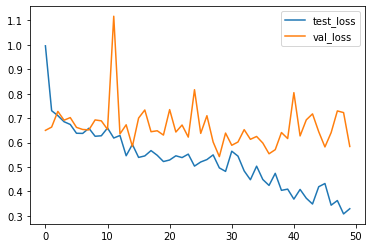

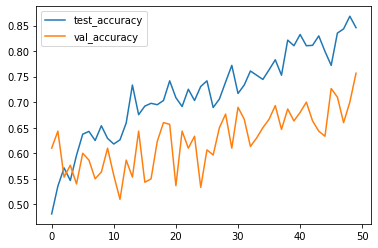

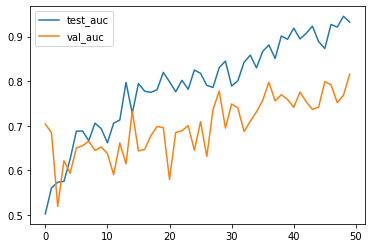

In [4]:
def skip_broken_images(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except GeneratorExit:
            break
        except:
            pass

history = model.fit_generator(
    skip_broken_images(training_data_generator),
    steps_per_epoch = 20,
    validation_data = validation_data_generator,
    validation_steps = 20,
    epochs = 50
)

plt.plot(history.history['loss'], label='test_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='test_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['auc'], label='test_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend()
plt.show()

# Evaluierungsdaten vorbereiten

In [4]:
evaluation_data_generator = image_generator.flow_from_directory(batch_size=20,
                                                           directory="./data/evaluation",
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

print(evaluation_data_generator.class_indices)

Found 92 images belonging to 2 classes.
{'acoustic guitar': 0, 'electric guitar': 1}


# Evaluierung

In [9]:
evaluation_loss, evaluation_accuracy, evaluation_auc = model.evaluate_generator(evaluation_data_generator)
print('\nEvaluation loss:', evaluation_loss)
print('\nEvaluation accuracy:', evaluation_accuracy)
print('\nEvaluation auc:', evaluation_auc)


model.save('model.h5')


Evaluation loss: 0.6059373438358306

Evaluation accuracy: 0.70652175

Evaluation auc: 0.77445656


# Modell laden

In [5]:
#loaded_model = tf.keras.models.load_model('model256-96acc.h5')
#loaded_model = tf.keras.models.load_model('model512-3cnn-974acc.h5')
#loaded_model = tf.keras.models.load_model('m512.h5')
#loaded_model = tf.keras.models.load_model('model_latest.h5')
loaded_model = tf.keras.models.load_model('model.h5')

# Predictions

total: 112, hits: 82, misses: 30, ratio: 0.73


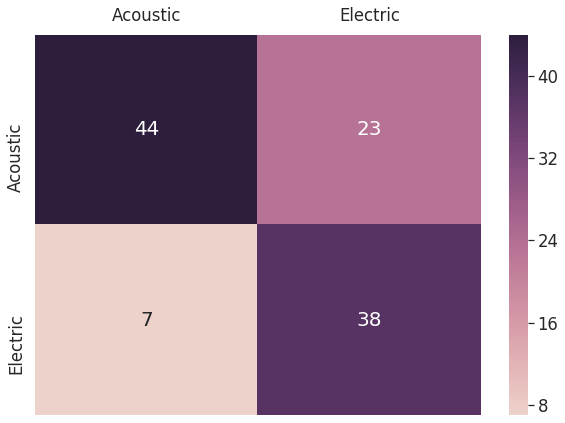

In [49]:
counter = 0
hits = 0

y_true=[]
y_pred=[]

for img, labels in evaluation_data_generator:        
    predictions = loaded_model.predict(img)    
    
    i = 0
    for prediction in predictions:
        y_pred.append(np.argmax(prediction))
        y_true.append(np.argmax(labels[i]))
  
        predicted_class = np.argmax(prediction)
        actual_class = np.argmax(labels[i])

        if predicted_class == actual_class:
            hits += 1

        #print("prediction: %d, actual: %d" % (predicted_class, actual_class))
        counter += 1
        i += 1

    if counter >= 100:
        break
    
print("total: %d, hits: %d, misses: %d, ratio: %.2f" % (counter, hits, counter - hits, hits / counter))

conf = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(conf, 
                     index = ["Acoustic", "Electric"], 
                     columns = ["Acoustic", "Electric"])

plt.figure(figsize = (10,7))

sn.set(font_scale=1.5)
ax = sn.heatmap(df_cm, 
           annot = True, 
           annot_kws = {"size": 20}, 
           cmap = sn.cubehelix_palette(100))

plt.tick_params(axis='both', which='major', 
                labelbottom = False, bottom = False, 
                top = False, labeltop = True)
plt.show()